# TRABAJO PRÁCTICO N° 4

### Reutilizamos el codigo hecho para el TP1, TP2  y TP3:

In [43]:
import pandas as pd
datos_05 = pd.read_stata("usu_individual_T105.dta")
datos_25 = pd.read_excel("usu_individual_T125.xls")

In [44]:
# Ponemos en minuscula los nombres de cada base de datos para que las columnas tengan  el mismo nombre
datos_05.columns = datos_05.columns.str.lower()
datos_25.columns = datos_25.columns.str.lower()

In [45]:
# Filtrar por región
# Cambiar los valores de region en la base de datos 2005 a numero
region_dic = {
    "Gran Buenos Aires": 1,
    "NOA": 40,
    "NEA": 41,
    "Cuyo": 42,
    "Pampeana": 43,
    "Patagónica": 44
}

# Reemplaza los valores de texto por números en la misma columna
datos_05["region"] = datos_05["region"].replace(region_dic)

datos_05 = datos_05[datos_05["region"] == 40]
datos_25 = datos_25[datos_25["region"] == 40]

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_28429/1740833018.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_05["region"] = datos_05["region"].replace(region_dic)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_28429/1740833018.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  datos_05["region"] = datos_05["region"].replace(region_dic)


In [46]:
# Unir las bases de datos
datos = pd.concat([datos_05, datos_25])
datos.reset_index(drop=True) # index original es descartado

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,v21_03_m,v22_01_m,v22_02_m,v22_03_m,p_deccf,p_rdeccf,p_gdeccf,p_pdeccf,p_ideccf,p_adeccf
0,125666,1.0,1.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125666,1.0,2.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125666,1.0,3.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125666,1.0,4.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125666,1.0,5.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,1,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19086,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19087,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,3,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19088,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,1,1,2025.0,1,40,N,22,108.0,...,0.0,0.0,0.0,0.0,7.0,8.0,NaN,7.0,8.0,8.0


In [47]:
# Selección de variables
datos = datos[["codusu","region", "ano4", "ch03", "ch04","ch06", "ch07", "ch08", "ch09", "ch10", "ch12","ch13","ch14", "ch15", "ch16", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup","itf","pp3e_tot","pp3f_tot"]]

In [48]:
def reemplazar_valores(columna, diccionario): # Función para reemplezar variables
    """
    Parámetros:
    - columna: nombre de la columna a modificar
    - diccionario: dict, mapeo {valor_original: valor_nuevo}
    """
    datos[columna] = datos[columna].replace(diccionario)
    datos[columna] = datos[columna].astype(float)

In [49]:
# Diccionarios para cambiar valores de las variables de 2005
sexo_dic = {
    "Varón":1,
    "Mujer":2
}
estado_civil_dic = {
    "Unido":1,
    "Casado":2,
    "Separado o divorciado":3,
    "Viudo":4,
    "Soltero":5,
}
cobertura_dic = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia y planes y seguros públicos": 23,
    "Obra social y mutual/prepaga/servicio de emergencia y planes y seguros públicos": 123
}
edu_dic = {
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7,
    "Ns./Nr.": 9
}
estado_dic = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
cat_dic = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
ch03_dic = {
    "Jefe": 1,
    "Cónyuge/Pareja": 2,
    "Hijo/Hijastro": 3,
    "Yerno/Nuera": 4,
    "Nieto": 5,
    "Madre/Padre": 6,
    "Suegro": 7,
    "Hermano": 8,
    "Otros familiares": 9,
    "No familiares": 10
}
leer_dic = {
    "Sí": 1,
    "No": 2,
    "Menor de 2 años": 3
}
cat_ocup_dic = {
    "Patrón": 1,
    "Cuenta propia": 2,
    "Obrero o empleado": 3,
    "Trabajador familiar sin remuneración": 4,
    "Ns./Nr.": 9
}
ch10_dic= {
    "Sí, asiste": 1,
    "No asiste, pero asistió": 2,
    "Nunca asistió": 3
}
ch15_dic = {
    "En esta localidad": 1,
    "En otra localidad": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "Ns./Nr.": 9
}
ch16_dic = {
    "En esta localidad": 1,
    "En otra localidad de esta provincia": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "No había nacido": 6,
    "Ns./Nr.": 9
}
ch14_dic = {
    '00': 0,
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '98': 98,
    '99': 99,
    '  ': None,   # a los espacios en blanco lo convierte en NaN
}
ch06_dic = {
    "Menos de 1 año":0
}
ch12_dic = {
    "Jardín/Preescolar" : 1,
    "Primario":2,
    "EGB":3,
    "Secundario":4,
    "Polimodal":5,
    "Terciario":6,
    "Universitario":7,
    "Posgrado Universitario":8,
    "Educación especial (discapacitado)":9
}

ch13_dic = {
    "Sí": 1,
    "No": 2,
    "Ns./Nr.": 3
}

reemplazar_valores("ch03", ch03_dic)
reemplazar_valores("ch04", sexo_dic)
reemplazar_valores("ch06", ch06_dic)
reemplazar_valores("ch07", estado_civil_dic)
reemplazar_valores("ch08", cobertura_dic)
reemplazar_valores("ch09", leer_dic)
reemplazar_valores("ch10", ch10_dic)
reemplazar_valores("ch12", ch12_dic)
reemplazar_valores("ch13", ch13_dic)
reemplazar_valores("ch14", ch14_dic)
reemplazar_valores("ch15", ch15_dic)
reemplazar_valores("ch16", ch16_dic)
reemplazar_valores("nivel_ed", edu_dic)
reemplazar_valores("estado", estado_dic)
reemplazar_valores("cat_inac", cat_dic)
reemplazar_valores("cat_ocup", cat_ocup_dic)

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_28429/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_28429/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_28429/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [50]:
# LIMPIEZA DE VARIABLES TRABAJADAS

datos.loc[datos["ipcf"] < 0, "ipcf"] = -1
datos.loc[datos["itf"] < 0, "itf"] = -1
datos.loc[datos["ch06"] < 0, "ch06"] = -1
datos.loc[datos["ch10"] == 0, "ch10"] = -1

# Eliminar valores extraños
datos = datos[~((datos["ipcf"] == -1) | (datos["ch06"] == -1) | (datos["ch10"] == -1)| (datos["itf"] == -1))]

In [51]:
#TABLA DE ADUTLOS EQUIVALENTES
# Leer la tabla de equivalencias (fila 4 = encabezados)
tabla = pd.read_excel(
    "tabla_adulto_equiv.xlsx",
    header=3,        # fila 4 (0-indexed)
    usecols="A:C",   # Edad, Mujeres, Varones
    decimal=","      # convierte "0,35" -> 0.35
)

# Renombrar columnas y limpiar
tabla = tabla.rename(columns={"Edad":"edad", "Mujeres":"mujeres", "Varones":"varones"})
tabla = tabla.dropna(subset=["edad"]).reset_index(drop=True)

# Pasar a formato largo (sexo en filas)
tabla_long = tabla.melt(id_vars="edad", var_name="sexo_txt", value_name="adulto_equiv")
map_sexo = {"varones": 1, "mujeres": 2}
tabla_long["ch04"] = tabla_long["sexo_txt"].str.lower().map(map_sexo)
tabla_long = tabla_long.rename(columns={"edad":"grupo_edad"})[["grupo_edad","ch04","adulto_equiv"]]

In [52]:
def edad_a_grupo(e):
    if pd.isna(e): return np.nan
    e = int(e)
    if e < 1:   return "Menor de 1 año"
    if e == 1:  return "1 año"
    if e == 2:  return "2 años"
    if e == 3:  return "3 años"
    if e == 4:  return "4 años"
    if e == 5:  return "5 años"
    if e == 6:  return "6 años"
    if e == 7:  return "7 años"
    if e == 8:  return "8 años"
    if e == 9:  return "9 años"
    if e == 10: return "10 años"
    if e == 11: return "11 años"
    if e == 12: return "12 años"
    if e == 13: return "13 años"
    if e == 14: return "14 años"
    if e == 15: return "15 años"
    if e == 16: return "16 años"
    if e == 17: return "17 años"
    if 18 <= e <= 29: return "18 a 29 años"
    if 30 <= e <= 45: return "30 a 45 años"
    if 46 <= e <= 60: return "46 a 60 años"
    if 61 <= e <= 75: return "61 a 75 años"
    return "más de 75 años"

datos["grupo_edad"] = datos["ch06"].apply(edad_a_grupo)

In [53]:
# limpiar restos previos
datos = datos.drop(columns=[c for c in datos.columns if c.startswith("adulto_equiv")], errors="ignore")

# merge controlado
datos = datos.merge(
    tabla_long[["grupo_edad","ch04","adulto_equiv"]].rename(columns={"adulto_equiv":"adulto_equiv_tbl"}),
    on=["grupo_edad","ch04"],
    how="left"
)

# dejar el nombre final y eliminar el alias
datos["adulto_equiv"] = datos.pop("adulto_equiv_tbl")

In [54]:
datos["ad_equiv_hogar"] = datos.groupby("codusu")["adulto_equiv"].transform("sum")

In [55]:
datos["ad_equiv_hogar"] = (
    datos.groupby("codusu")["adulto_equiv"].transform("sum")
)

In [56]:
# POBRE Y NO POBRES

# Valores de la canasta básica total por adulto equivalente
cbt_valores = {2005: 205.07, 2025: 365_177.00}

# ingreso_necesario = CBT(año) * adultos equivalentes del hogar
datos["ingreso_necesario"] = (
    datos["ano4"].map(cbt_valores) * datos["ad_equiv_hogar"]
)

In [57]:
# Crear la columna "pobre": 1 si ITF < ingreso_necesario, 0 si no
datos["pobre"] = (datos["itf"] < datos["ingreso_necesario"]).astype(int) # Convierte True → 1 y False → 0

In [58]:
respondieron = datos[datos["itf"] != 0].copy()
norespondieron = datos[(datos["itf"] == 0) | (datos["itf"].isna())].copy()

# Chequeo rápido
print("Total de casos:", len(datos))
print("Respondieron:", len(respondieron))
print("No respondieron:", len(norespondieron))

Total de casos: 18624
Respondieron: 17522
No respondieron: 1102


In [59]:
from sklearn.model_selection import train_test_split

def split_por_anio(respondieron: pd.DataFrame, year_col: str = "ano4",
                   test_size: float = 0.30, random_state: int = 444):
    """
    Para cada año en `respondieron[year_col]`, divide en train (70%) y test (30%)
    usando train_test_split con random_state=444.
    Devuelve un diccionario: {anio: {"train": DataFrame, "test": DataFrame}}.
    """
    assert year_col in respondieron.columns, f"No existe la columna de año: {year_col}"

    splits = {}
    for anio, df_y in respondieron.groupby(year_col, dropna=False):
        train_df, test_df = train_test_split(
            df_y, test_size=test_size, random_state=random_state
        )
        splits[anio] = {"train": train_df.copy(), "test": test_df.copy()}
    return splits

In [60]:
splits = split_por_anio(respondieron, year_col="ano4", test_size=0.30, random_state=444)

train_2025 = splits[2025]["train"]
test_2025  = splits[2025]["test"]

train_2005 = splits[2005]["train"]
test_2005  = splits[2005]["test"]

In [61]:
import pandas as pd
import numpy as np

def preparar_X_y(df, target_col="pobre", pea_only=True):
    d = df.copy()
    if pea_only:
        d = d.loc[d["estado"].isin([1, 2])].copy()
    
    cols = [target_col, "ch04", "ch06", "nivel_ed", "ch07", "estado"]
    d = d[cols].copy()
    d = d.loc[d["nivel_ed"] != 9]
    d = d.dropna(subset=cols)

    y = d[target_col].astype(int)

    if set(d["ch04"].dropna().unique()) == {1, 2}:
        d["ch04"] = (d["ch04"] == 2).astype(float)
    else:
        d["ch04"] = d["ch04"].astype(float)

    d["ch06"] = d["ch06"].astype(float)

    dums_nivel = pd.get_dummies(
        d["nivel_ed"].astype("category"),
        prefix="nivel_ed",
        drop_first=True,
        dtype=float
    )

    dums_otros = pd.get_dummies(
        d[["ch07", "estado"]].astype("category"),
        prefix=["ch07", "estado"],
        drop_first=True,
        dtype=float
    )

    X = pd.concat([d[["ch04", "ch06"]].astype(float), dums_nivel, dums_otros], axis=1)
    X["intercept"] = 1.0

    return X, y

In [62]:
X_train_2025, y_train_2025 = preparar_X_y(train_2025, target_col="pobre", pea_only=True)
X_test_2025,  y_test_2025  = preparar_X_y(test_2025,  target_col="pobre", pea_only=True)

X_train_2005, y_train_2005 = preparar_X_y(train_2005, target_col="pobre", pea_only=True)
X_test_2005,  y_test_2005  = preparar_X_y(test_2005,  target_col="pobre", pea_only=True)

In [63]:
X_train_2025, y_train_2025 = preparar_X_y(train_2025, target_col="pobre", pea_only=True)
X_test_2025,  y_test_2025  = preparar_X_y(test_2025,  target_col="pobre", pea_only=True)

print(X_train_2025.isna().sum()) #me fijo que ni hayan NaNs

ch04            0
ch06            0
nivel_ed_2.0    0
nivel_ed_3.0    0
nivel_ed_4.0    0
nivel_ed_5.0    0
nivel_ed_6.0    0
nivel_ed_7.0    0
ch07_2.0        0
ch07_3.0        0
ch07_4.0        0
ch07_5.0        0
estado_2.0      0
intercept       0
dtype: int64


## A. Modelo de Regresion Logistica con Regularización: Ridge y LASSO

### 1)

- sacamos intercept y dejamos únicamente los predictores
- estandarizamos todas las variables X
- construimos la grilla de penalidades con λ = 10ⁿ y calculamos C = 1/λ
- entrenamos los modelos logit con penalización por LASSO y por Ridge para cada valor de C
- guardamos y apilamos los coeficientes obtenidos en cada λ
- traducimos y renombramos las dummies según las categorías oficiales de la EPH
- graficamos dos paneles con los coeficientes en función de log₁₀(λ), primero LASSO y luego Ridge
- agregamos una línea horizontal en 0 como referencia para interpretar los cambios en los coeficientes

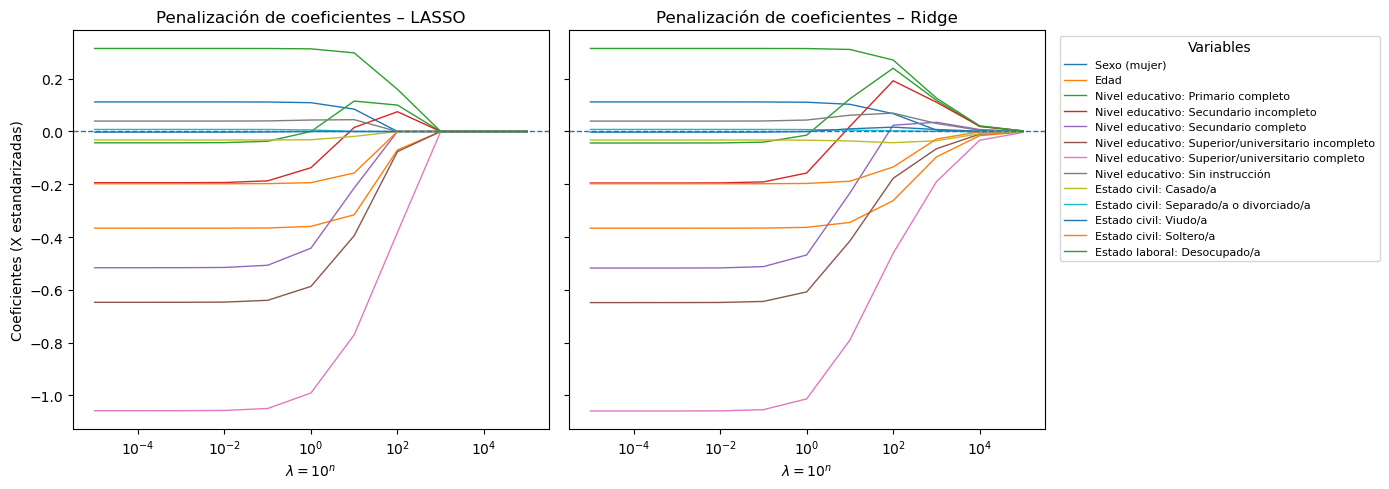

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def preparar_X_y(df, target_col="pobre", pea_only=True):
    d = df.copy()
    if pea_only:
        d = d.loc[d["estado"].isin([1, 2])].copy()
    
    cols = [target_col, "ch04", "ch06", "nivel_ed", "ch07", "estado"]
    d = d[cols].copy()
    d = d.loc[d["nivel_ed"] != 9]
    d = d.dropna(subset=cols)

    y = d[target_col].astype(int)

    if set(d["ch04"].dropna().unique()) == {1, 2}:
        d["ch04"] = (d["ch04"] == 2).astype(float)
    else:
        d["ch04"] = d["ch04"].astype(float)

    d["ch06"] = d["ch06"].astype(float)

    dums_nivel = pd.get_dummies(
        d["nivel_ed"].astype("category"),
        prefix="nivel_ed",
        drop_first=True,
        dtype=float
    )

    dums_otros = pd.get_dummies(
        d[["ch07", "estado"]].astype("category"),
        prefix=["ch07", "estado"],
        drop_first=True,
        dtype=float
    )

    X = pd.concat([d[["ch04", "ch06"]].astype(float), dums_nivel, dums_otros], axis=1)
    X["intercept"] = 1.0

    return X, y


X, y = preparar_X_y(train_2025, target_col="pobre", pea_only=True)

X = X.drop(columns=["intercept"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

feature_names = X.columns.to_list()
p = X_scaled.shape[1]

n_vals = np.arange(-5, 6)
lambdas = 10.0 ** n_vals
Cs = 1.0 / lambdas

coefs_lasso = np.zeros((len(Cs), p))
coefs_ridge = np.zeros((len(Cs), p))

for i, C in enumerate(Cs):
    modelo_lasso = LogisticRegression(
        penalty="l1",
        C=C,
        solver="liblinear",
        max_iter=2000,
        random_state=0
    )
    modelo_lasso.fit(X_scaled, y.values)
    coefs_lasso[i, :] = modelo_lasso.coef_.ravel()

    modelo_ridge = LogisticRegression(
        penalty="l2",
        C=C,
        solver="liblinear",
        max_iter=2000,
        random_state=0
    )
    modelo_ridge.fit(X_scaled, y.values)
    coefs_ridge[i, :] = modelo_ridge.coef_.ravel()

nivel_ed_desc = {
    1: "Primario incompleto (incl. educación especial)",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario completo",
    5: "Superior/universitario incompleto",
    6: "Superior/universitario completo",
    7: "Sin instrucción"
}

estado_civil_desc = {
    1: "Unido/a",
    2: "Casado/a",
    3: "Separado/a o divorciado/a",
    4: "Viudo/a",
    5: "Soltero/a"
}

estado_laboral_desc = {
    1: "Ocupado/a",
    2: "Desocupado/a"
}

label_map = {}
for col in feature_names:
    if col == "ch04":
        label_map[col] = "Sexo (mujer)"
    elif col == "ch06":
        label_map[col] = "Edad"
    elif col.startswith("nivel_ed_"):
        sufijo = col.split("_")[-1]
        try:
            k = int(float(sufijo))
            desc = nivel_ed_desc.get(k, str(k))
            label_map[col] = f"Nivel educativo: {desc}"
        except ValueError:
            label_map[col] = col
    elif col.startswith("ch07_"):
        sufijo = col.split("_")[-1]
        try:
            k = int(float(sufijo))
            desc = estado_civil_desc.get(k, str(k))
            label_map[col] = f"Estado civil: {desc}"
        except ValueError:
            label_map[col] = col
    elif col.startswith("estado_"):
        sufijo = col.split("_")[-1]
        try:
            k = int(float(sufijo))
            desc = estado_laboral_desc.get(k, str(k))
            label_map[col] = f"Estado laboral: {desc}"
        except ValueError:
            label_map[col] = col
    else:
        label_map[col] = col

display_names = [label_map[c] for c in feature_names]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

lines = []
for j in range(p):
    line = axes[0].plot(lambdas, coefs_lasso[:, j], linewidth=1)[0]
    lines.append(line)
axes[0].axhline(0, linestyle="--", linewidth=1)
axes[0].set_xscale("log")
axes[0].set_title("Penalización de coeficientes – LASSO")
axes[0].set_xlabel(r"$\lambda = 10^n$")
axes[0].set_ylabel("Coeficientes (X estandarizadas)")

for j in range(p):
    axes[1].plot(lambdas, coefs_ridge[:, j], linewidth=1)
axes[1].axhline(0, linestyle="--", linewidth=1)
axes[1].set_xscale("log")
axes[1].set_title("Penalización de coeficientes – Ridge")
axes[1].set_xlabel(r"$\lambda = 10^n$")

axes[1].legend(
    lines,
    display_names,
    title="Variables",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=8
)

plt.tight_layout()
plt.show()

### 2)

- usamos los predictores estandarizados y la grilla de lambdas definida antes, recordando que LogisticRegressionCV usa C como el inverso de lambda.
- ajustamos una regresión logística penalizada con LASSO usando 5 folds. A partir de la matriz de scores obtuvimos la accuracy por lambda y convertimos esos valores en errores de clasificación.
- elegimos la lambda óptima como la que minimiza el error de validación promedio en los cinco folds.
- hacemos lo mismo  para Ridge, obteniendo su lambda óptima y su error medio de validación.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV

logitcv_lasso = LogisticRegressionCV(
    Cs=Cs,
    penalty="l1",
    solver="liblinear",
    cv=5,
    scoring="accuracy",
    max_iter=2000,
    random_state=0
)
logitcv_lasso.fit(X_scaled, y.values)

scores_lasso = list(logitcv_lasso.scores_.values())[0]
errors_lasso = 1 - scores_lasso
mean_errors_lasso = errors_lasso.mean(axis=0)
idx_min_lasso = np.argmin(mean_errors_lasso)
lambda_cv_lasso = float(lambdas[idx_min_lasso])
C_opt_lasso = float(logitcv_lasso.C_[0])

logitcv_ridge = LogisticRegressionCV(
    Cs=Cs,
    penalty="l2",
    solver="lbfgs",
    cv=5,
    scoring="accuracy",
    max_iter=2000,
    random_state=0
)
logitcv_ridge.fit(X_scaled, y.values)

scores_ridge = list(logitcv_ridge.scores_.values())[0]
errors_ridge = 1 - scores_ridge
mean_errors_ridge = errors_ridge.mean(axis=0)
idx_min_ridge = np.argmin(mean_errors_ridge)
lambda_cv_ridge = float(lambdas[idx_min_ridge])
C_opt_ridge = float(logitcv_ridge.C_[0])

print("LASSO - lambda^cv:", round(lambda_cv_lasso, 5), " | C óptimo:", round(C_opt_lasso, 5))
print("Error de clasificación medio (validación) LASSO:", round(mean_errors_lasso[idx_min_lasso], 4))
print("Ridge - lambda^cv:", round(lambda_cv_ridge, 5), " | C óptimo:", round(C_opt_ridge, 5))
print("Error de clasificación medio (validación) Ridge:", round(mean_errors_ridge[idx_min_ridge], 4))

LASSO - lambda^cv: 1e-05  | C óptimo: 100000.0
Error de clasificación medio (validación) LASSO: 0.3191
Ridge - lambda^cv: 1.0  | C óptimo: 1.0
Error de clasificación medio (validación) Ridge: 0.3195


- con los errores de validación por fold construimos boxplots: un boxplot para LASSO y otro para Ridge, donde cada caja representa la distribución del error para un valor de lambda.

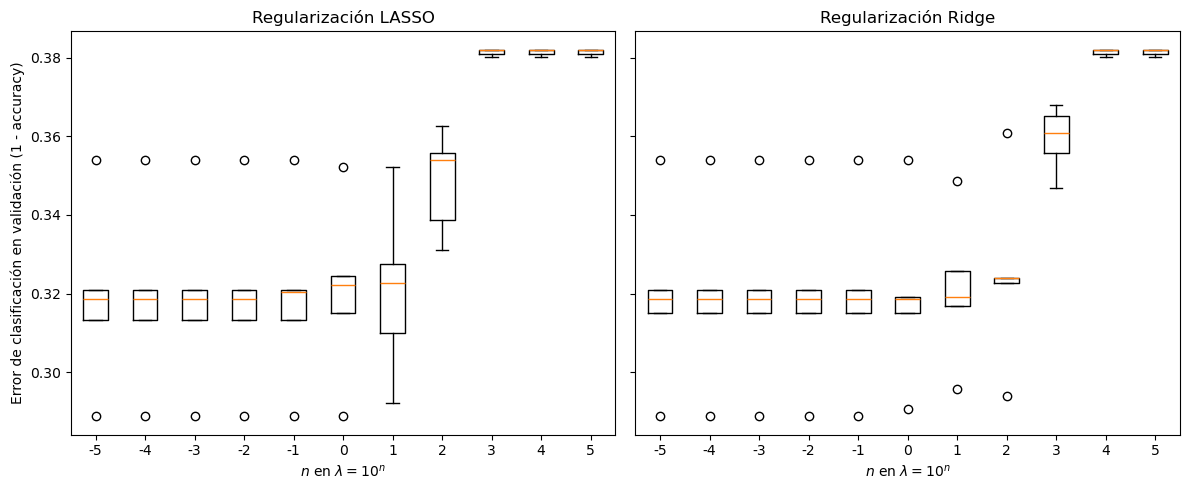

In [66]:
positions = np.arange(len(lambdas)) + 1

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].boxplot([errors_lasso[:, j] for j in range(len(lambdas))], positions=positions)
axes[0].set_xticks(positions)
axes[0].set_xticklabels(n_vals)
axes[0].set_xlabel(r"$n$ en $\lambda = 10^n$")
axes[0].set_ylabel("Error de clasificación en validación (1 - accuracy)")
axes[0].set_title("Regularización LASSO")

axes[1].boxplot([errors_ridge[:, j] for j in range(len(lambdas))], positions=positions)
axes[1].set_xticks(positions)
axes[1].set_xticklabels(n_vals)
axes[1].set_xlabel(r"$n$ en $\lambda = 10^n$")
axes[1].set_title("Regularización Ridge")

plt.tight_layout()
plt.show()

#### opcional

- calculamos la proporción de coeficientes iguales a cero en LASSO para cada lambda y lo graficamos para ver cómo aumenta la cantidad de variables descartadas cuando la penalización crece.

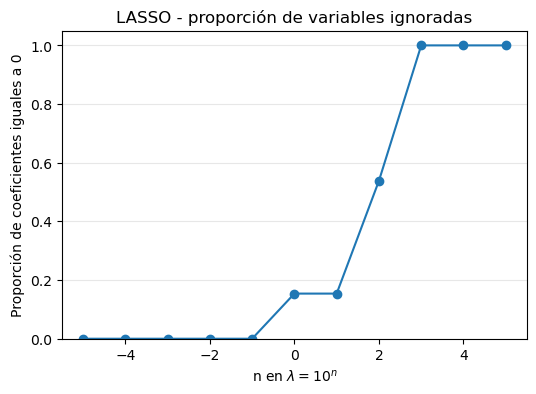

In [67]:
prop_ceros_lasso = (coefs_lasso == 0).mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(n_vals, prop_ceros_lasso, marker="o")
plt.xlabel("n en $\lambda = 10^n$")
plt.ylabel("Proporción de coeficientes iguales a 0")
plt.title("LASSO - proporción de variables ignoradas")
plt.ylim(0, 1.05)
plt.grid(True, axis="y", alpha=0.3)
plt.show()

### 3)

- estimamos una regresion logistica sin penalidad utilizando todas las variables estandarizadas de X_train.
- reestimamos el modelo aplicando penalizacion LASSO con el valor de C obtenido por validacion cruzada en el ejercicio anterior.
- ajustamos tambien una regresion logistica con penalizacion Ridge, usando el C seleccionado por CV.
- construimos una tabla que compara, para cada predictor, los coeficientes sin penalizar, los coeficientes con LASSO y los coeficientes con Ridge.
- miramos que la regularizacion reduce la magnitud de los coeficientes con respecto al modelo sin penalidad, y que L1 puede llevar algunos coeficientes exactamente a cero.
- verificamos que Ridge no elimina variables, todos los coeficientes permanecen distintos de cero, aunque mas pequenos debido al efecto de shrinkage.

In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

logit_sin_pen = LogisticRegression(
    penalty=None,
    solver="lbfgs",
    max_iter=2000
)
logit_sin_pen.fit(X_scaled, y.values)

logit_l1_cv = LogisticRegression(
    penalty="l1",
    C=C_opt_lasso,
    solver="liblinear",
    max_iter=2000,
    random_state=0
)
logit_l1_cv.fit(X_scaled, y.values)

logit_l2_cv = LogisticRegression(
    penalty="l2",
    C=C_opt_ridge,
    solver="lbfgs",
    max_iter=2000,
    random_state=0
)
logit_l2_cv.fit(X_scaled, y.values)

coefs_sin = logit_sin_pen.coef_.ravel()
coefs_l1 = logit_l1_cv.coef_.ravel()
coefs_l2 = logit_l2_cv.coef_.ravel()

tabla_coefs = pd.DataFrame(
    {
        "coef_sin_penalidad": coefs_sin,
        "coef_LASSO_lambda_cv": coefs_l1,
        "coef_Ridge_lambda_cv": coefs_l2
    },
    index=feature_names
)

tabla_coefs_limpia = tabla_coefs.copy()
tabla_coefs_limpia.index = tabla_coefs_limpia.index.map(lambda x: label_map.get(x, x))


tabla_coefs_limpia.round(4)

,coef_sin_penalidad,coef_LASSO_lambda_cv,coef_Ridge_lambda_cv
Sexo (mujer),0.1121,0.1121,0.1110
Edad,-0.3662,-0.3662,-0.3634
Nivel educativo: Primario completo,-0.0434,-0.0428,-0.0140
Nivel educativo: Secundario incompleto,-0.1950,-0.1941,-0.1577
Nivel educativo: Secundario completo,-0.5173,-0.5161,-0.4681
Nivel educativo: Superior/universitario incompleto,-0.6481,-0.6472,-0.6083
Nivel educativo: Superior/universitario completo,-1.0589,-1.0578,-1.0141
Nivel educativo: Sin instrucción,0.0394,0.0395,0.0434
Estado civil: Casado/a,-0.0322,-0.0322,-0.0328
Estado civil: Separado/a o divorciado/a,0.0078,0.0078,0.0073


## B. Árboles

### 4)

Cantidad de alphas: 312
Primeros alphas: [0.00000000e+00 2.16840434e-19 1.67731763e-06 2.13476790e-06
 2.51597645e-06 3.35463527e-06 4.47284702e-06 5.03195290e-06
 5.59105878e-06 6.28994113e-06]


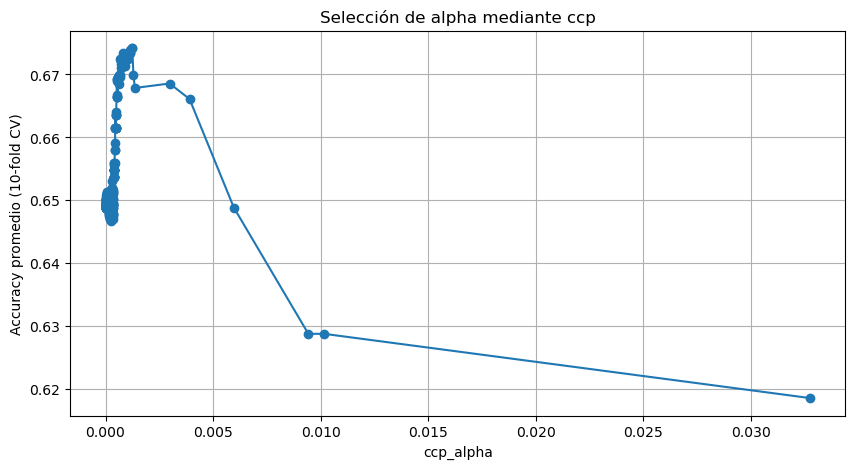

>>> Mejor alpha seleccionado: 0.0012394068766930066
Accuracy en TRAIN: 0.700
Accuracy en TEST:  0.682


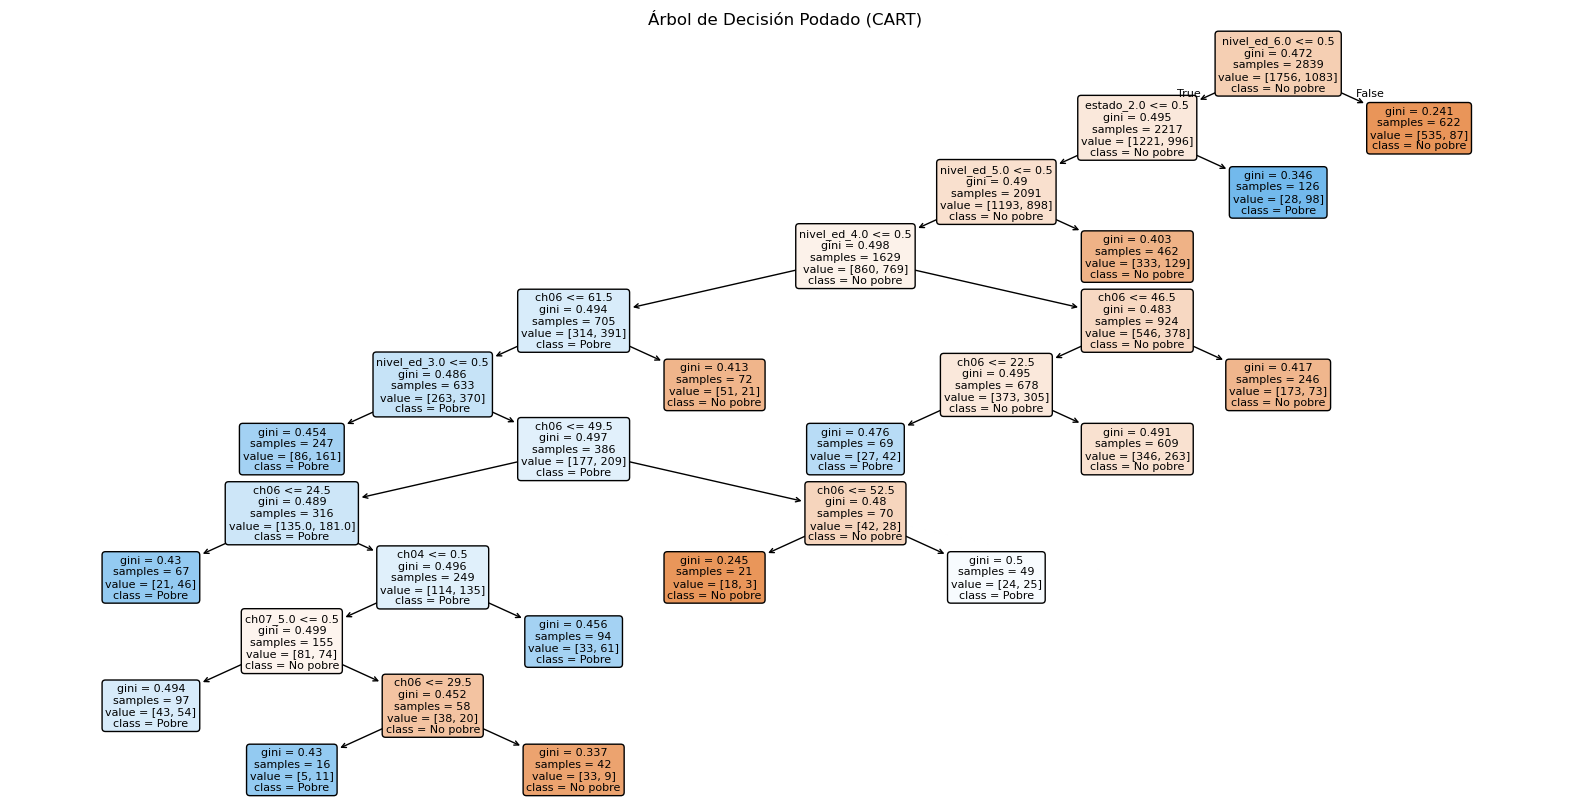

In [69]:
# === EJERCICIO 4 — Árbol de Decisión con Poda (CART) ===
# Usa X_train_2025, X_test_2025, y_train_2025, y_test_2025 ya generados en las consignas previas

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Alinear columnas entre train y test
X_test_2025 = X_test_2025.reindex(columns=X_train_2025.columns, fill_value=0)

# 1. Entrenamos un árbol COMPLETO (sin poda, sobreajustado)
arbol_completo = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=1
)
arbol_completo.fit(X_train_2025, y_train_2025)

# 2. Obtenemos ruta de coste-complejidad
path = arbol_completo.cost_complexity_pruning_path(X_train_2025, y_train_2025)

# Filtrar alphas negativos producidos por errores numéricos
ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas >= 0])

print("Cantidad de alphas:", len(ccp_alphas))
print("Primeros alphas:", ccp_alphas[:10])

# 3. Validación cruzada para cada alpha
scores = []
for ccp in ccp_alphas:
    arbol_temp = DecisionTreeClassifier(
        random_state=42,
        ccp_alpha=ccp
    )
    cv_score = cross_val_score(arbol_temp, X_train_2025, y_train_2025, cv=10)
    scores.append(cv_score.mean())

# 4. Gráfico del CV vs alpha
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy promedio (10-fold CV)")
plt.title("Selección de alpha mediante ccp")
plt.grid(True)
plt.show()

# 5. Seleccionamos el mejor alpha
best_alpha = ccp_alphas[np.argmax(scores)]
print(">>> Mejor alpha seleccionado:", best_alpha)

# 6. Reentrenamos el árbol PODADO final
arbol_podado = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha
)
arbol_podado.fit(X_train_2025, y_train_2025)

# 7. Métricas en train y test
acc_train = arbol_podado.score(X_train_2025, y_train_2025)
acc_test = arbol_podado.score(X_test_2025, y_test_2025)

print(f"Accuracy en TRAIN: {acc_train:.3f}")
print(f"Accuracy en TEST:  {acc_test:.3f}")

# 8. Visualizamos el árbol podado
plt.figure(figsize=(20, 10))
plot_tree(
    arbol_podado,
    feature_names=X_train_2025.columns,
    class_names=["No pobre", "Pobre"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árbol de Decisión Podado (CART)")
plt.show()


### 5)

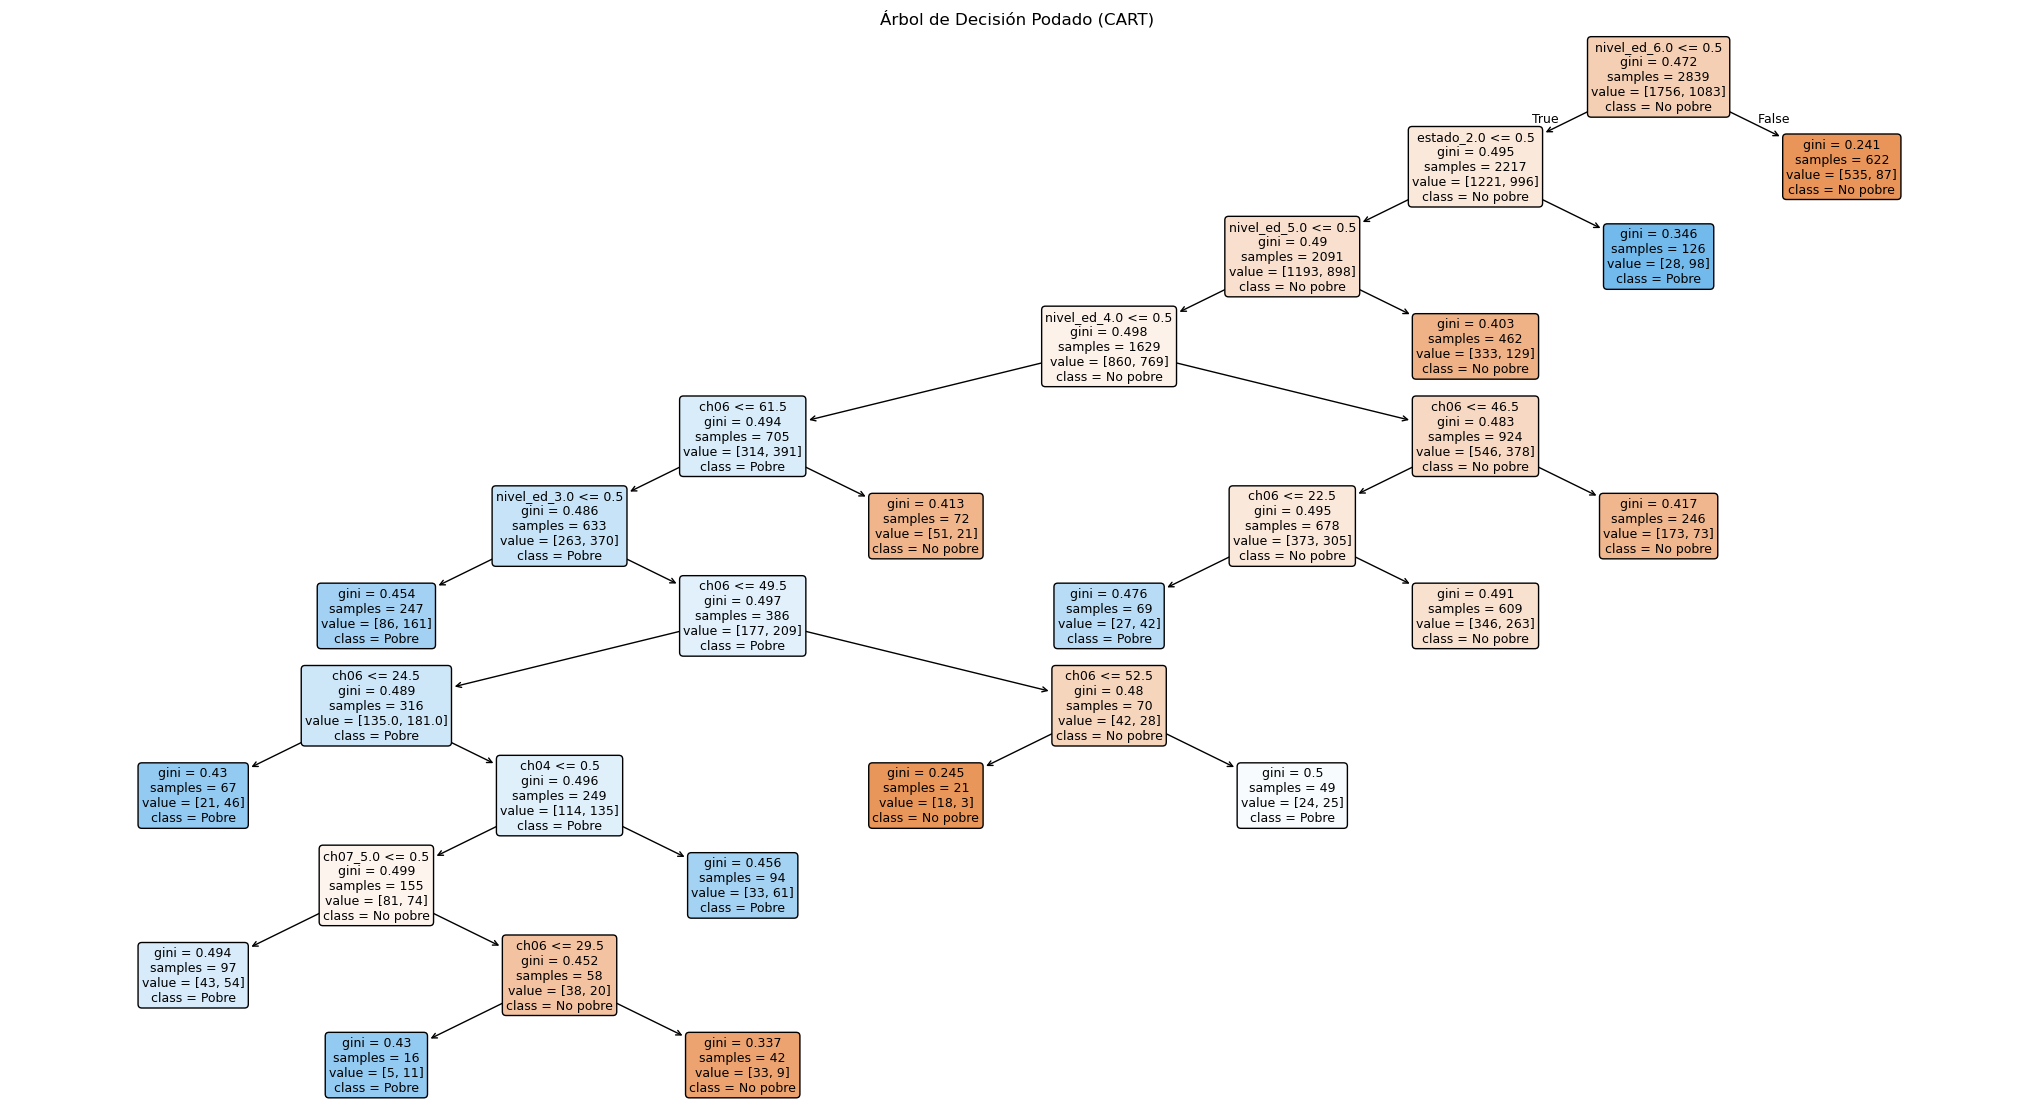

In [70]:
#PANEL A
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(26,14))
plot_tree(
    arbol_podado,
    feature_names=X_train_2025.columns,
    class_names=["No pobre", "Pobre"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Árbol de Decisión Podado (CART)")
plt.show()


/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_28429/1417972627.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


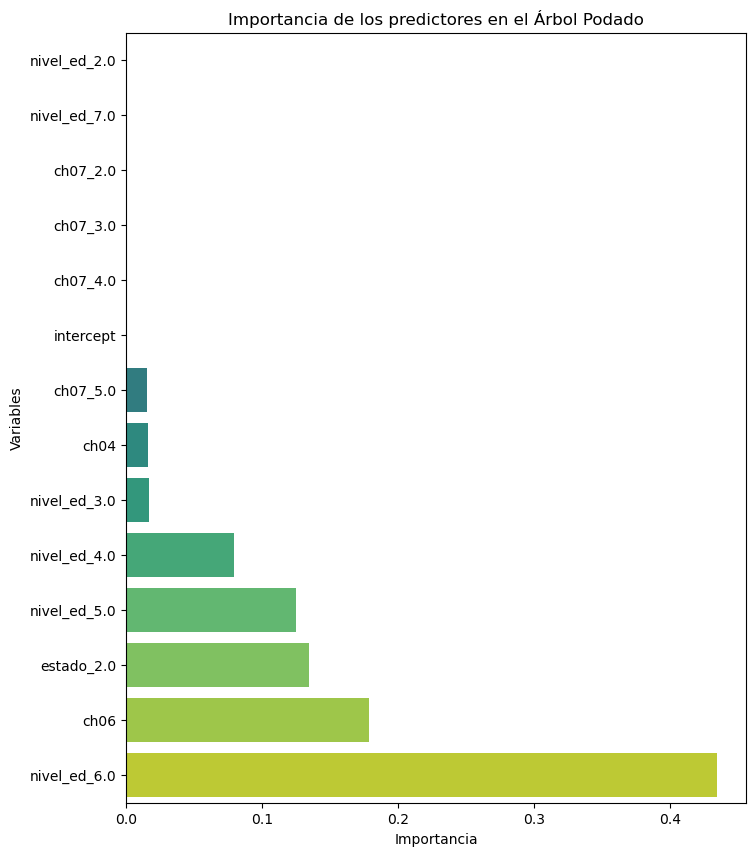

In [71]:
#PANEL B
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.Series(
    arbol_podado.feature_importances_,
    index=X_train_2025.columns
).sort_values(ascending=True)

plt.figure(figsize=(8,10))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Importancia de los predictores en el Árbol Podado")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()


## C. Comparación entre métodos

### 6)

In [72]:
# 6. Computen la matriz de confusión (p>0,5), la curva ROC y las dos métricas que utilizó en el TP3.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    recall_score
)

# ================================
# Probabilidades en el set de test
# ================================

# y verdadera
y_test = y_test_2025.astype(int).values

# --- Matriz de diseño para los modelos logísticos (igual que en el fit) ---

X_test_logit = X_test_2025.copy()

# sacamos intercepto porque para los modelos penalizados usamos solo feature_names
if "intercept" in X_test_logit.columns:
    X_test_logit = X_test_logit.drop(columns=["intercept"])

# reordenamos columnas para que coincidan con el entrenamiento
X_test_logit = X_test_logit.reindex(columns=feature_names, fill_value=0)

# escalamos con el mismo scaler usado al entrenar
X_test_scaled = scaler.transform(X_test_logit.values)

# --- Probabilidades de cada modelo (TP4) ---

# Logit con penalidad LASSO y Ridge
proba_lasso = logit_l1_cv.predict_proba(X_test_scaled)[:, 1]
proba_ridge = logit_l2_cv.predict_proba(X_test_scaled)[:, 1]

# Árbol de decisión podado (no necesita escalado)
proba_tree = arbol_podado.predict_proba(X_test_2025)[:, 1]

# Diccionario con todas las probabilidades (modelos TP4)
probas_modelos = {
    "Logit LASSO (TP4)": proba_lasso,
    "Logit Ridge (TP4)": proba_ridge,
    "Árbol podado (TP4)": proba_tree
}

# NOTA: el Logit y KNN con K-CV del TP3 se comparan en el escrito

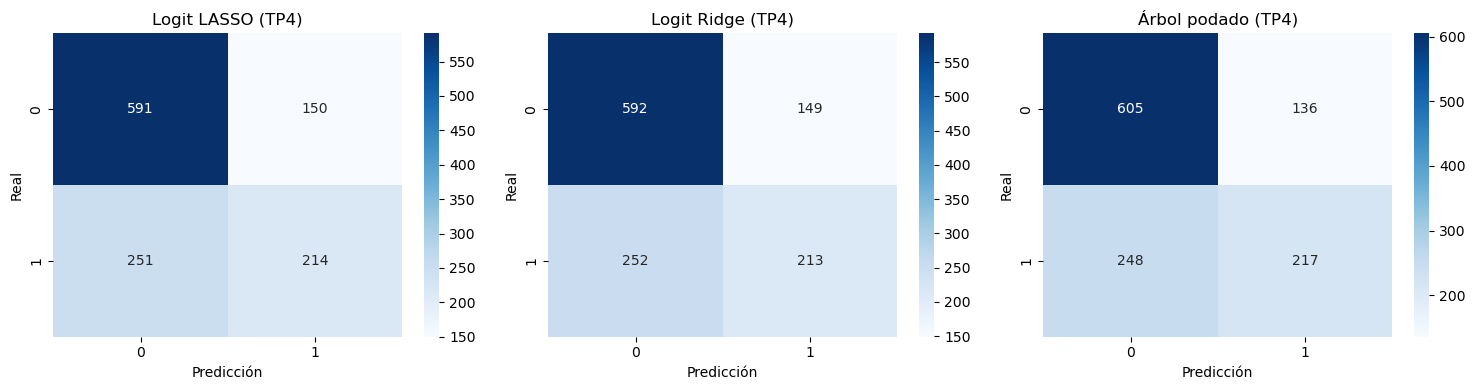

In [74]:
# Matrices de confusión (p > 0.5)

n_modelos = len(probas_modelos)
n_cols = min(3, n_modelos)
n_rows = int(np.ceil(n_modelos / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = np.array(axes).reshape(-1)

for ax, (nombre, proba) in zip(axes, probas_modelos.items()):
    y_pred = (proba > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# si sobran ejes, los apago
for ax in axes[len(probas_modelos):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

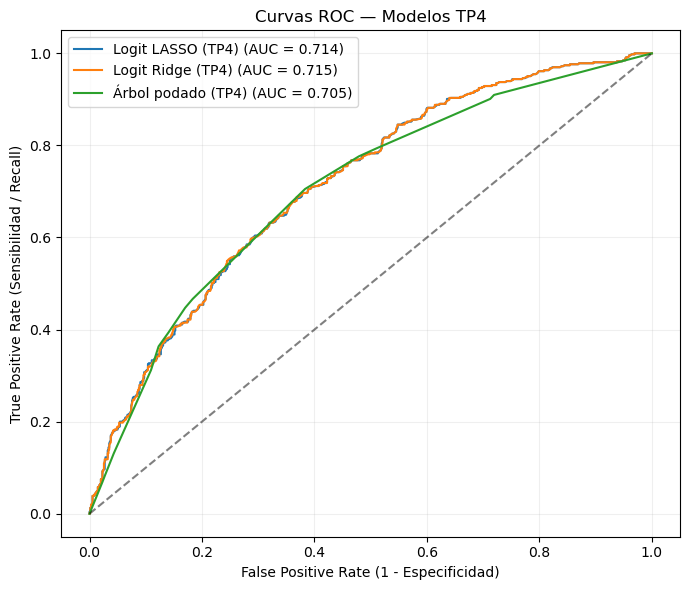

In [75]:
# Curvas ROC

plt.figure(figsize=(7, 6))

for nombre, proba in probas_modelos.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", alpha=0.5)  # modelo aleatorio

plt.xlabel("False Positive Rate (1 - Especificidad)")
plt.ylabel("True Positive Rate (Sensibilidad / Recall)")
plt.title("Curvas ROC — Modelos TP4")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [76]:
# Métricas del TP3: Accuracy y Sensibilidad

filas = []
for nombre, proba in probas_modelos.items():
    y_pred = (proba > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    filas.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Sensibilidad (Recall)": rec,
        "1 - Accuracy": 1 - acc
    })

metricas_tp4 = pd.DataFrame(filas).round(3)

print("=== Métricas en la base de test (TP4) ===")
display(metricas_tp4)

=== Métricas en la base de test (TP4) ===


,Modelo,Accuracy,Sensibilidad (Recall),1 - Accuracy
0,Logit LASSO (TP4),0.667,0.460,0.333
1,Logit Ridge (TP4),0.667,0.458,0.333
2,Árbol podado (TP4),0.682,0.467,0.318


### 7)

In [77]:
# en el infomre